## **Notebook EC#04**
## Multivariate Regression Basics Using Premier League Football Data.
## Code based on [this content](https://medium.com/@b1ll/understanding-multivariate-linear-regression-with-python-7496e5f5dcf0) and [this content](https://github.com/b1ll1/FootballML/tree/main/MultivariateRegression), with improvements.
## It is necessary to upload the two CSV files.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Túlio Queiroz de Paula


### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Grab the Data and Clean
I scraped this data and I believe that wherever there is a n/a value, the table where I scraped the data from omits values from the table when there is no occurrence of the stat for either team.

In [4]:
df = pd.read_csv('data/Prem_2022_2023_Match_Stats.csv')
df = df.fillna(0)

### Filter Out Columns that Do Not Contribute to the Covariance Plot. Create the Covariance Data.

In [5]:
stats = df[['Home Goals FT',
       'Away Goals FT', 'H Possession %',
       'A Possession %', 'H Shots on target', 'A Shots on target', 'H Shots',
       'A Shots', 'H Touches', 'A Touches', 'H Passes', 'A Passes',
       'H Tackles', 'A Tackles', 'H Clearances', 'A Clearances', 'H Corners',
       'A Corners', 'H Offsides', 'A Offsides', 'H Yellow cards',
       'A Yellow cards', 'H Fouls conceded', 'A Fouls conceded', 'H Red cards',
       'A Red cards']]
correlations = stats.corr()

### Plot the Covariance

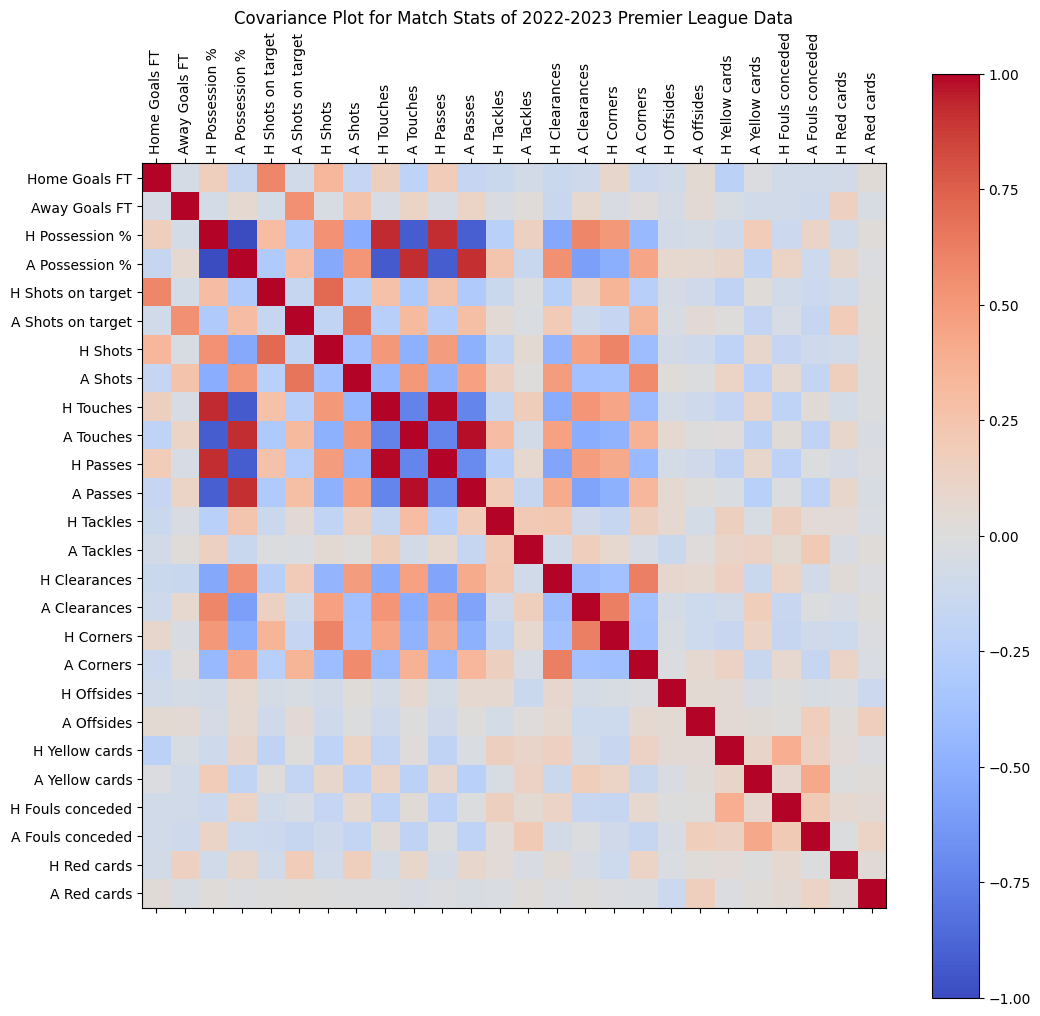

In [6]:
plt.figure(figsize=(12, 12))
plt.matshow(correlations, cmap='coolwarm', fignum=0)
plt.xticks(range(len(stats.columns)), stats.columns, rotation='vertical')
plt.yticks(range(len(stats.columns)), stats.columns)
plt.colorbar()
plt.title('Covariance Plot for Match Stats of 2022-2023 Premier League Data');
plt.show()

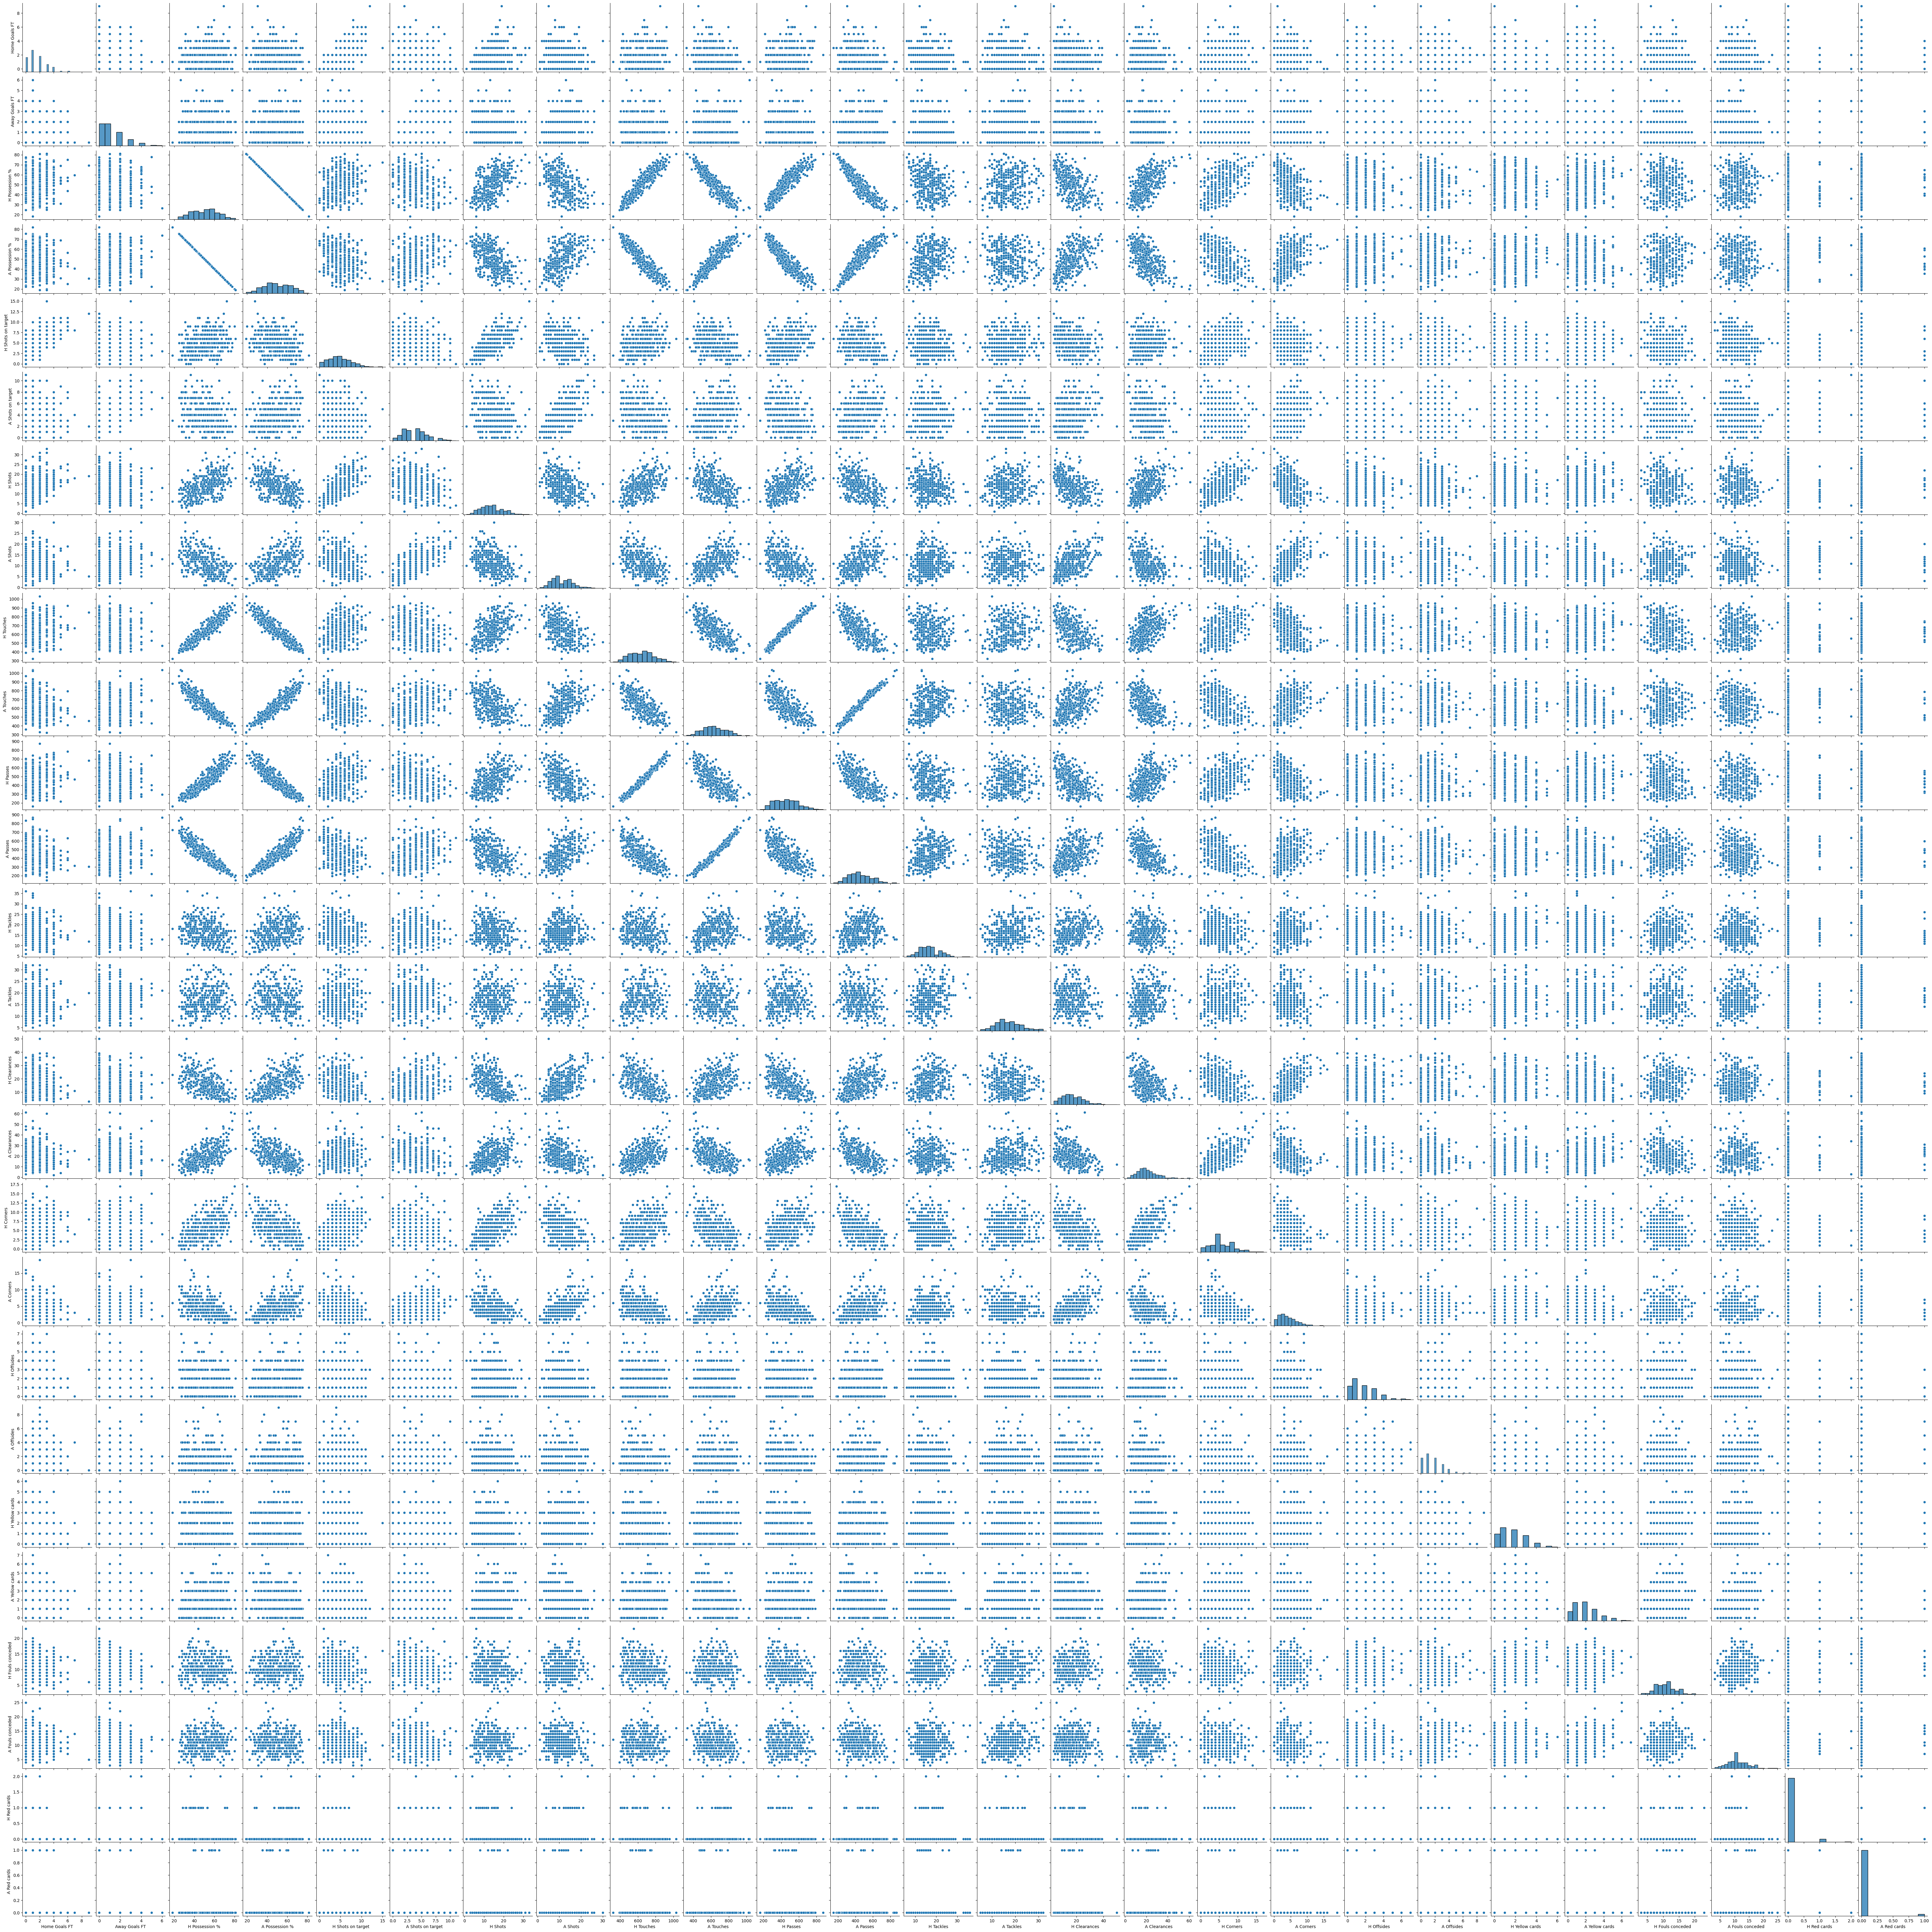

In [7]:
# Ploting a pairwise graph
import seaborn as sns

sns.pairplot(stats)
plt.show()

### Separate Out the Independent Variables from the Dependent Ones

In this case, we have two models, one to predict the number of home goals and one to predict the number of away goals.

In [8]:
X = stats.drop(['Home Goals FT', 'Away Goals FT'], axis=1)
y_h = stats['Home Goals FT']
y_a = stats['Away Goals FT']

In [9]:
features = stats.drop(['Home Goals FT', 'Away Goals FT'], axis=1).columns

### Generate the Model Via scikit-learn's LinearRegression()

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [67]:
LR_h = LinearRegression()
LR_h.fit(X, y_h)
LR_a = LinearRegression()
LR_a.fit(X, y_a)

LinearRegression()

In [68]:
print(LR_h.intercept_)
print(LR_h.coef_)

1.2919983724817583
[-3.20259053  3.20259053  5.12924621  0.61852761 -0.52648227 -0.56724996
 -6.52118368 -5.7604513  10.36835337  0.61948566  0.80424814  0.64351998
  0.60082174 -1.13553904 -0.32552362 -0.24590329 -0.43268135  0.70018262
 -0.71716777  0.1724801  -0.1564189  -0.48716837 -0.51684662  0.23516806]


In [205]:
print(LR_a.intercept_)
print(LR_a.coef_)

0.8065938144295405
[ 3.28669166e+00 -3.28669166e+00  3.41403311e-01  3.22584851e+00
 -7.19288371e-01 -9.65005585e-03  5.08566392e+00 -3.23978009e+00
 -9.16063577e+00  7.49026967e+00 -8.68428753e-02 -1.09084779e-01
 -1.70950000e+00  6.00566404e-01 -4.60653434e-01 -5.41224592e-01
 -1.88318893e-01  4.55481104e-01  8.34622105e-03  2.56915870e-02
 -5.20675925e-03 -6.28580757e-01  6.46168691e-01 -5.14952005e-01]


### Use the Model to Predict on Unseen Data

#### Read the 2023-2024 Premier League Match Stats Data and Clean

In [15]:
df2 = pd.read_csv('data/Prem_2023_2024_Match_Stats.csv')
df2 = df2.fillna(0)

#### Prepare the Data for the Model

In [16]:
stats = df2[['Home Goals FT',
       'Away Goals FT', 'H Possession %',
       'A Possession %', 'H Shots on target', 'A Shots on target', 'H Shots',
       'A Shots', 'H Touches', 'A Touches', 'H Passes', 'A Passes',
       'H Tackles', 'A Tackles', 'H Clearances', 'A Clearances', 'H Corners',
       'A Corners', 'H Offsides', 'A Offsides', 'H Yellow cards',
       'A Yellow cards', 'H Fouls conceded', 'A Fouls conceded', 'H Red cards',
       'A Red cards']]

Xt = stats.drop(['Home Goals FT', 'Away Goals FT'], axis=1)
Xt = scaler.transform(Xt)
yt_h = stats['Home Goals FT']
yt_a = stats['Away Goals FT']

In [17]:
import statsmodels.api as sm

In [18]:
X2 = sm.add_constant(X)
LR1_h = sm.OLS(y_h,X2).fit()
LR1_a = sm.OLS(y_a,X2).fit()

###### **Important note: The OLS command is equivalent to the LinearRegression command, except for the offset treatment. Both models differ only on the first three coefficients, given that they represent the offset. Notice that x1 + x2 = 1. This code includes both commands to illustrate the equivalence and the effect of multicollinearity.**

In [19]:
LR1_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Home Goals FT   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     13.74
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           1.51e-36
Time:                        14:18:42   Log-Likelihood:                -551.24
No. Observations:                 380   AIC:                             1150.
Df Residuals:                     356   BIC:                             1245.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8613      0.545      1.579      0.115      -0.211       1.934
x1            -2.7719      1.339     -2.071      0.039      -5.404      -0.140
x2             3.6333      1.355      2.681      0.008       0.968       6.298
x3             5.1292      0.508     10.098      0.000       4.130       6.128
x4             0.6185      0.381      1.622      0.106      -0.131       1.368
x5            -0.5265      0.584     -0.902      0.368      -1.674       0.621
x6            -0.5672      0.564     -1.005      0.315      -1.677       0.542
x7            -6.5212      3.555     -1.834      0.067     -13.513       0.471
x8            -5.7605      3.712     -1.552      0.122     -13.061       1.540
x9            10.3684      3.700      2.802      0.005       3.092      17.645
x10            0.6195      3.832      0.162      0.872      -6.917       8.156
x11            0.8042      0.478      1.683      0.093      -0.135       1.744
x12            0.6435      0.379      1.700      0.090      -0.101       1.388
x13            0.6008      0.529      1.135      0.257      -0.441       1.642
x14           -1.1355      0.624     -1.820      0.070      -2.363       0.092
x15           -0.3255      0.446     -0.731      0.466      -1.202       0.551
x16           -0.2459      0.536     -0.459      0.647      -1.300       0.808
x17           -0.4327      0.285     -1.517      0.130      -0.994       0.128
x18            0.7002      0.346      2.026      0.044       0.020       1.380
x19           -0.7172      0.301     -2.385      0.018      -1.309      -0.126
x20            0.1725      0.322      0.535      0.593      -0.461       0.806
x21           -0.1564      0.397     -0.394      0.694      -0.938       0.625
x22           -0.4872      0.455     -1.070      0.285      -1.382       0.408
x23           -0.5168      0.453     -1.140      0.255      -1.408       0.375
x24            0.2352      0.353      0.665      0.506      -0.460       0.930
==============================================================================
Omnibus:                       31.968   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.053
Skew:                           0.588   Prob(JB):                     6.06e-11
Kurtosis:                       4.261   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
LR1_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Away Goals FT   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     10.42
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           6.08e-28
Time:                        14:18:42   Log-Likelihood:                -504.90
No. Observations:                 380   AIC:                             1058.
Df Residuals:                     356   BIC:                             1152.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5377      0.483      1.114      0.266      -0.412       1.487
x1             3.5556      1.185      3.001      0.003       1.225       5.886
x2            -3.0178      1.200     -2.516      0.012      -5.377      -0.659
x3             0.3414      0.450      0.759      0.448      -0.543       1.226
x4             3.2258      0.337      9.559      0.000       2.562       3.890
x5            -0.7193      0.517     -1.392      0.165      -1.735       0.297
x6            -0.0097      0.499     -0.019      0.985      -0.992       0.973
x7             5.0857      3.147      1.616      0.107      -1.103      11.275
x8            -3.2398      3.286     -0.986      0.325      -9.702       3.222
x9            -9.1606      3.275     -2.797      0.005     -15.602      -2.719
x10            7.4903      3.392      2.208      0.028       0.819      14.162
x11           -0.0868      0.423     -0.205      0.837      -0.919       0.745
x12           -0.1091      0.335     -0.325      0.745      -0.768       0.550
x13           -1.7095      0.469     -3.647      0.000      -2.631      -0.788
x14            0.6006      0.552      1.087      0.278      -0.486       1.687
x15           -0.4607      0.394     -1.168      0.244      -1.236       0.315
x16           -0.5412      0.474     -1.141      0.255      -1.474       0.392
x17           -0.1883      0.252     -0.746      0.456      -0.685       0.308
x18            0.4555      0.306      1.489      0.137      -0.146       1.057
x19            0.0083      0.266      0.031      0.975      -0.515       0.532
x20            0.0257      0.285      0.090      0.928      -0.535       0.587
x21           -0.0052      0.352     -0.015      0.988      -0.697       0.687
x22           -0.6286      0.403     -1.560      0.120      -1.421       0.164
x23            0.6462      0.401      1.610      0.108      -0.143       1.435
x24           -0.5150      0.313     -1.646      0.101      -1.130       0.100
==============================================================================
Omnibus:                       26.614   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.806
Skew:                           0.600   Prob(JB):                     1.24e-07
Kurtosis:                       3.756   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<font color="green">
Atividade (a)<br>
Com base nos valores absolutos dos coeficientes obtidos para os modelos de predição (regressão linear multivariada) que estimam o número de gols em casa e como visitante, apresente os três fatores mais influentes para os dois modelos obtidos.<br>
</font>

Resposta:

In [163]:
## coeficientes mais relevantes scikit-learn
coefs_h = np.sort(np.absolute(LR_h.coef_))
max_coefs_h = coefs_h[-3:]

coefs_a = np.sort(np.absolute(LR_a.coef_))
max_coefs_a = coefs_a[-3:]

pos_h = []
for coef in max_coefs_h:
    pos_h.append(np.where(np.absolute(LR_h.coef_) == coef)[0])
    
pos_a = []
for coef in max_coefs_a:
    pos_a.append(np.where(np.absolute(LR_a.coef_) == coef)[0])

features_h = [feature for feature in features[[pos[0] for pos in pos_h]]]
features_a = [feature for feature in features[[pos[0] for pos in pos_a]]]

print(f"As features mais relevantes para os gols em casa são: {features_h}.\nAs features mais relevantes para os gols como visitante são: {features_a}.")

As features mais relevantes para os gols em casa são: ['A Touches', 'H Touches', 'H Passes'].
As features mais relevantes para os gols como visitante são: ['H Touches', 'A Passes', 'H Passes'].


In [181]:
## coeficientes mais relevantes OLS
coefs1_h = np.sort(np.absolute(LR1_h.params))
max_coefs1_h = coefs1_h[-3:]

coefs1_a = np.sort(np.absolute(LR1_a.params))
max_coefs1_a = coefs1_a[-3:]

pos1_h = []
for coef in max_coefs1_h:
    pos1_h.append(np.where(np.absolute(np.array(LR1_h.params)) == coef)[0])
    
pos1_a = []
for coef in max_coefs1_a:
    pos1_a.append(np.where(np.absolute(np.array(LR1_a.params)) == coef)[0])

features1_h = [feature for feature in features[[pos[0]-1 for pos in pos1_h]]] # -1 because .params begins with intercept at index 0
features1_a = [feature for feature in features[[pos[0]-1 for pos in pos1_a]]] #

print(f"As features mais relevantes para os gols em casa são: {features1_h}.\nAs features mais relevantes para os gols como visitante são: {features1_a}.")

As features mais relevantes para os gols em casa são: ['A Touches', 'H Touches', 'H Passes'].
As features mais relevantes para os gols como visitante são: ['H Touches', 'A Passes', 'H Passes'].


As features mais relevantes estão listadas acima e, basicamente, são relacionadas ao desempenho dos times no que diz respeito ao domínio da bola: touches - qualquer evento no qual o jogador toque na bola - e passes.

<font color="green">
Atividade (b)<br>
Explique o motivo pelo qual a análise da Atividade (a) só faz sentido com o emprego do comando MinMaxScaler junto a todas as entradas. Considere também que a multicolinearidade existente entre variáveis independentes não é tão significativa. A multicolinearidade dificulta determinar o efeito individual de cada variável independente na variável dependente e pode levar a estimativas de coeficientes instáveis, além de reduzir a interpretabilidade do modelo.<br>
</font>

Resposta:

In [41]:
df[["A Passes","A Fouls conceded", "A Corners", "A Offsides", "A Red cards"]]

A Passes  A Fouls conceded  A Corners  A Offsides  A Red cards
0       438.0              11.0        5.0         2.0          0.0
1       571.0              16.0        5.0         4.0          0.0
2       566.0              11.0       16.0         2.0          0.0
3       612.0               9.0        4.0         4.0          0.0
4       546.0               9.0        4.0         1.0          0.0
..        ...               ...        ...         ...          ...
375     533.0              12.0        3.0         1.0          0.0
376     437.0               5.0        3.0         1.0          0.0
377     565.0              10.0        5.0         3.0          0.0
378     426.0              10.0        4.0         1.0          0.0
379     604.0              10.0        9.0         0.0          0.0

[380 rows x 5 columns]

Porque as features possuem valores numéricos em "escalas" distintas, i.e. temos centenas de passes, dezenas de faltas, algumas unidades de escanteios, poquíssimos cartões vermelhos, etc.<br>Ou seja, é preciso uniformizar essa amplitude dos dados através do MinMaxScaler()

<font color="green">
Atividade (c)<br>
Apresente o motivo pelo qual se usou o comando [scaler.fit_transform] para os dados de treinamento e o comando [scaler.transform] para os dados de teste.<br>
</font>

Resposta: <br>
Utiliza-se <i>.fit_transform()</i> para os dados de treinamento e apenas <i>.transform()</i> para os dados de teste para que os parâmetros computados pelo <i>.fit()</i> nos dados de treinamento sejam aplicados (<i>.transform()</i>) no dataset, sem que novos parâmetros sejam calculados para os dados de teste. <br>
O comando <i>.fit_transform()</i> é o conjunto dos comandos <i>.fit()</i> e <i>.transform()</i>. O <i>.fit()</i> visa analisar os dados e obter os parâmetros - mínimo, máximo, média, variância, etc. - necessários, de acordo com o scaler (MinMaxScaler, StandardScaler, etc.), para performar a transformação (<i>.transform()</i>) posterior. Logo, ao utilizar <i>.fit_transform()</i> nos dados de treino, queremos que o modelo aprenda os parâmetros do training set e realize a transformação nos mesmos. Entretanto, não utilizamos <i>.fit_transform()</i> nos dados de teste porque não queremos que o modelo aprenda seus padrões - queremos que o modelo enxergue os dados como uma completa novidade - e, portanto, aplicamos apenas a transformação (<i>.transform()</i>) nos dados - com os parâmetros aprendidos no dataset de treino - para que tenhamos dados de treino e teste proporcionalmente reescalados e, em seguida, proceder a predição. 

### Generate the Model Via scikit-learn's RidgeCV()

In [21]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-6, 6, 20)

#Lasso Cross validation
ridge_cv_h = RidgeCV(alphas = alphas).fit(X, y_h)
ridge_cv_a = RidgeCV(alphas = alphas).fit(X, y_a)

In [22]:
ridge_cv_h_alpha = ridge_cv_h.alpha_
print(ridge_cv_h_alpha)
ridge_cv_a_alpha = ridge_cv_a.alpha_
print(ridge_cv_a_alpha)

0.026366508987303555
0.026366508987303555


In [23]:
ridge_cv_h.coef_

array([-2.73735817,  2.73735817,  5.11359551,  0.57352106, -0.60907083,
       -0.62099055, -4.17688028, -5.33867831,  7.49773812,  0.76794586,
        0.62468665,  0.44645719,  0.41359108, -1.37826456, -0.3326112 ,
       -0.21857304, -0.44598898,  0.70764071, -0.72517125,  0.15928468,
       -0.14012014, -0.5718635 , -0.46746573,  0.20914275])

In [24]:
ridge_cv_a.coef_

array([ 2.77121597e+00, -2.77121597e+00,  2.94209528e-01,  3.25160341e+00,
       -6.48936176e-01, -6.42731290e-02,  2.22415364e+00, -7.25393894e-01,
       -5.69240030e+00,  4.34913273e+00, -1.57816209e-01, -3.34691470e-02,
       -1.64974830e+00,  5.98395053e-01, -4.46518143e-01, -5.86801357e-01,
       -1.59935513e-01,  4.08193524e-01,  1.32319950e-03,  8.75063282e-03,
       -9.72166306e-02, -5.07183022e-01,  5.99971230e-01, -4.99810397e-01])

### Generate the Model Via scikit-learn's LassoCV()

In [25]:
import warnings
warnings.filterwarnings("ignore")

#Using the linear CV model
from sklearn.linear_model import LassoCV

alphas = np.logspace(-6, 6, 20)

#Lasso Cross validation
lasso_cv_h = LassoCV(alphas = alphas, random_state=0).fit(X, y_h)
lasso_cv_a = LassoCV(alphas = alphas, random_state=0).fit(X, y_a)

In [26]:
lasso_cv_h_alpha = lasso_cv_h.alpha_
print(lasso_cv_h_alpha)
lasso_cv_a_alpha = lasso_cv_a.alpha_
print(lasso_cv_a_alpha)

0.00615848211066026
0.00615848211066026


In [27]:
lasso_cv_h.coef_

array([ 0.        , -0.        ,  4.60478948,  0.        , -0.02591549,
       -0.22124514,  0.        , -0.8544163 ,  0.18037058, -0.        ,
       -0.        , -0.08052514, -0.        , -1.95558296, -0.16559163,
       -0.        , -0.28184342,  0.54708433, -0.68857974, -0.        ,
       -0.        , -0.22780909, -0.        ,  0.        ])

In [28]:
lasso_cv_a.coef_

array([-0.        ,  0.        , -0.        ,  3.2235544 , -0.06504438,
       -0.        , -0.        ,  0.        , -0.        ,  0.26070634,
       -0.        ,  0.        , -1.44478585,  0.27593239, -0.        ,
       -0.17433193, -0.        ,  0.03936947, -0.        , -0.        ,
       -0.        , -0.        ,  0.11197677, -0.14737562])

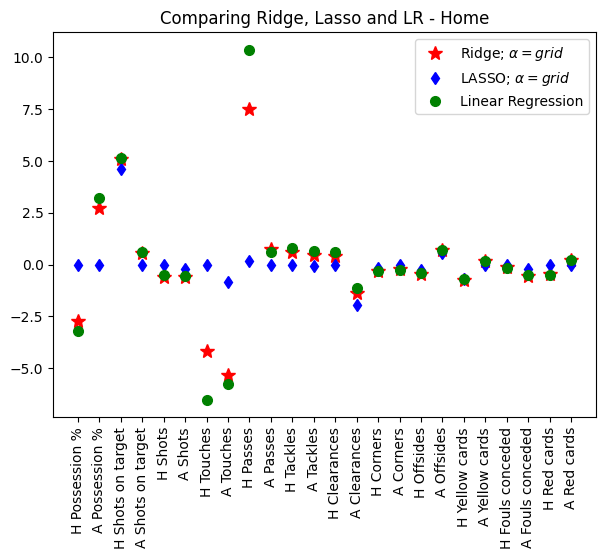

In [29]:
#plot size
plt.figure(figsize = (7, 5))
#add plot for ridge regression
plt.plot(features,ridge_cv_h.coef_,linestyle='none',marker='*',markersize=10,color='red',label=r'Ridge; $\alpha = grid$',)

#add plot for lasso regression
plt.plot(features,lasso_cv_h.coef_,linestyle='none',marker='d',markersize=6,color='blue',label=r'LASSO; $\alpha = grid$')

#add plot for linear model
plt.plot(features,LR_h.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparing Ridge, Lasso and LR - Home")
plt.show()

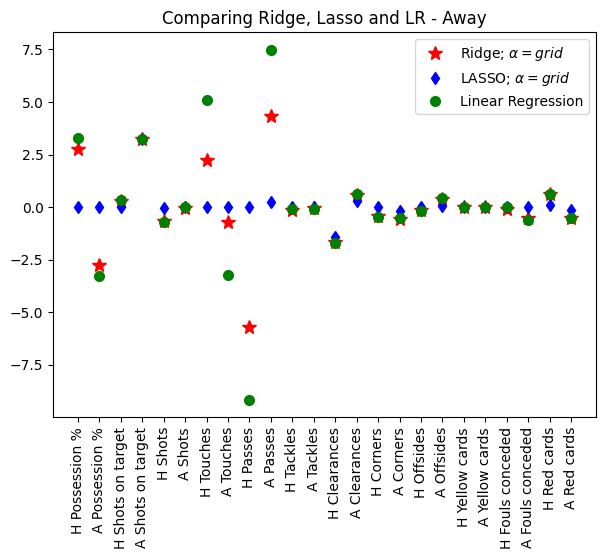

In [30]:
#plot size
plt.figure(figsize = (7, 5))
#add plot for ridge regression
plt.plot(features,ridge_cv_a.coef_,linestyle='none',marker='*',markersize=10,color='red',label=r'Ridge; $\alpha = grid$',)

#add plot for lasso regression
plt.plot(features,lasso_cv_a.coef_,linestyle='none',marker='d',markersize=6,color='blue',label=r'LASSO; $\alpha = grid$')

#add plot for linear model
plt.plot(features,LR_a.coef_,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparing Ridge, Lasso and LR - Away")
plt.show()

<font color="green">
Atividade (d)<br>
Explique o comportamento dos coeficientes dos três modelos de regressão que estão sendo comparados, seja para o cenário [home] quanto para o cenário [away].<br>
</font>

Resposta: <br>
Como é de se esperar e apresentado nos gráficos, os coeficientes assumem maiores valores com a LinearRegression usual e valores intermediários com o uso de Ridge e Lasso - por vezes (muitas) valores nulos com Lasso. <br>O motivo dos coeficientes serem mais moderados com Ridge e Lasso é evidente: Ridge e Lasso são penalizações à norma (Norma Dois e Norma Um respectivamente) do vetor de pesos obtido na regressão linear. Ou seja, o vetor de pesos que minimiza o erro na regressão linear agora não é mais a única preocupação, pois a solução deve minimizar o erro sem aumentar a norma do vetor - inibe valores elevados dos coeficientes que constituem o vetor de pesos, evitando cenários de overfitting.<br>Ademais, a penalização com Lasso agrega um fator importante que é a seleção de features - os muitos valores nulos versados acima. Isso ocorre porque o uso da Norma Um resulta em entidades geométricas com vértices. <Br>Em um caso bidimensional, minimizar a Norma Um de **W** = [w<sub>1</sub>, w<sub>2</sub>] implica em ||**W**||<sub>1</sub> = |w<sub>1</sub>| + |w<sub>2</sub>| $\leq$ s, e, ao plotar os pontos que satisfazem a expressão, obtem-se um quadrado rotacionado (uma figura com "formato de diamante" - "diamond shape" como é frequente na literatura) que possui, nesse caso, 4 vértices (sobre os eixos coordenados). Se s é consideravelmente grande, o conjunto dos pontos que satisfazem a minimização da norma também conterá a solução da minimização da loss function. Entretanto, não é esse o cenário desejado, pois esse caso é equivalente a uma regressão linear sem nenhuma regularização (os coeficientes de **W** tomam valores livremente e a solução será o ponto de mínimo que obteríamos com uma regressão linear). Assim, a solução regularizada de interesse será um ponto fronteiriço comum entre a superfície determinada pelas soluções da loss function e a região determinada pela minimização da ||**W**||<sub>1</sub>. Esse ponto de interseção entre a superfície da função e o ente geométrico formado pela Norma Um tem grande probabilidade de ocorrer justamente nos vértices, os quais estão situados sobre os eixos coordenados - o que implica em um dos coeficientes assumir valor zero, elimminando a feature em questão. <br> A figura na próxima célula representa bem o caso bidimensional e ajuda na intuição para casos com mais dimensões. O "diamante" e o círculo representam a minimização de ||**W**||<sub>1</sub>, enquanto as elipses representam as curvas de nível da superfíce da loss function.

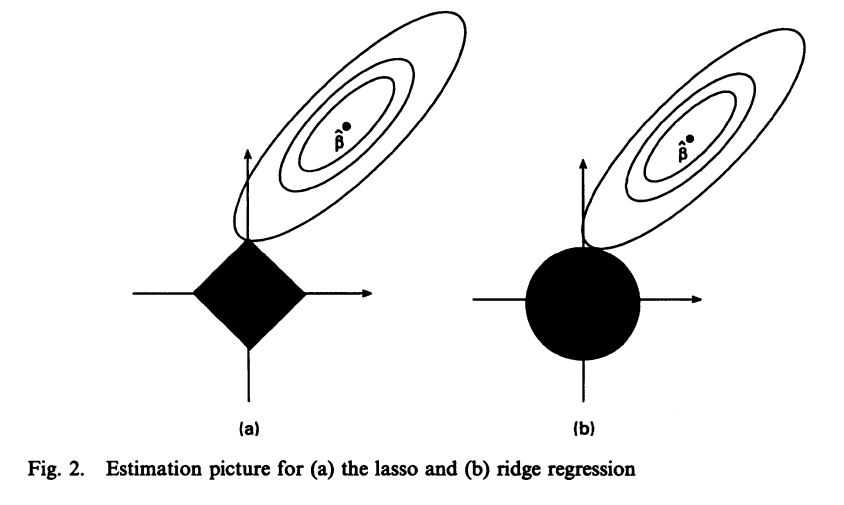

<i>fonte:</i> <br>
TIBSHIRANI, R. Regression Shrinkage and Selection Via the Lasso. Journal of the Royal Statistical Society Series B: Statistical Methodology, jan. 1996.


#### **Checking the MSE Metric for the Models**

In [31]:
yt1_pred_h = LR_h.predict(Xt)
yt1_pred_a = LR_a.predict(Xt)

mse_h = mean_squared_error(yt_h, yt1_pred_h)
mse_a = mean_squared_error(yt_a, yt1_pred_a)

print("For the LR model")
print("Home Goals Model:")
print(f"Mean Squared Error: {mse_h}")
print("\nFor the LR model")
print("Away Goals Model:")
print(f"Mean Squared Error: {mse_a}")

yt2_pred_h = ridge_cv_h.predict(Xt)
yt2_pred_a = ridge_cv_a.predict(Xt)

mse_h = mean_squared_error(yt_h, yt2_pred_h)
mse_a = mean_squared_error(yt_a, yt2_pred_a)

print("\nFor the Ridge model")
print("Home Goals Model:")
print(f"Mean Squared Error: {mse_h}")
print("\nFor the Ridge model")
print("Away Goals Model:")
print(f"Mean Squared Error: {mse_a}")

yt3_pred_h = lasso_cv_h.predict(Xt)
yt3_pred_a = lasso_cv_a.predict(Xt)

mse_h = mean_squared_error(yt_h, yt3_pred_h)
mse_a = mean_squared_error(yt_a, yt3_pred_a)

print("\nFor the LASSO model")
print("Home Goals Model:")
print(f"Mean Squared Error: {mse_h}")
print("\nFor the LASSO model")
print("Away Goals Model:")
print(f"Mean Squared Error: {mse_a}")

For the LR model
Home Goals Model:
Mean Squared Error: 1.1408066961881744

For the LR model
Away Goals Model:
Mean Squared Error: 0.7570818661577845

For the Ridge model
Home Goals Model:
Mean Squared Error: 1.1109428053025865

For the Ridge model
Away Goals Model:
Mean Squared Error: 0.7484404781831014

For the LASSO model
Home Goals Model:
Mean Squared Error: 1.0039576738993499

For the LASSO model
Away Goals Model:
Mean Squared Error: 0.74283991121605


## **Looking at the prediction scores**

#### LR: Add Predictions to DataFrame and Create Results Columns for Comparison

In [32]:
df2['Home Goals FT Prediction'] = yt1_pred_h
df2['Away Goals FT Prediction'] = yt1_pred_a

df2['Result'] = ''
df2.loc[df2['Home Goals FT'] > df2['Away Goals FT'], 'Result'] = 'H'
df2.loc[df2['Home Goals FT'] == df2['Away Goals FT'], 'Result'] = 'D'
df2.loc[df2['Home Goals FT'] < df2['Away Goals FT'], 'Result'] = 'A'

df2['Predicted Result'] = ''
df2.loc[df2['Home Goals FT Prediction'] > df2['Away Goals FT Prediction'], 'Predicted Result'] = 'H'
df2.loc[df2['Home Goals FT Prediction'] == df2['Away Goals FT Prediction'], 'Predicted Result'] = 'D'
df2.loc[df2['Home Goals FT Prediction'] < df2['Away Goals FT Prediction'], 'Predicted Result'] = 'A'

df2['Home Goals FT Prediction Rounded'] = df2['Home Goals FT Prediction'].round(0)
df2['Away Goals FT Prediction Rounded'] = df2['Away Goals FT Prediction'].round(0)

In [33]:
df2[['Date', 'Home Team', 'Away Team', 'Home Goals FT',
       'Away Goals FT', 'Home Goals FT Prediction', 'Home Goals FT Prediction Rounded', 'Away Goals FT Prediction', 'Away Goals FT Prediction Rounded']].head(10)

Date       Home Team      Away Team  Home Goals FT  Away Goals FT  \
0  2023-10-29        West Ham        Everton              0              1   
1  2023-10-29         Man Utd       Man City              0              3   
2  2023-10-29       Liverpool  Nott'm Forest              3              0   
3  2023-10-27  Crystal Palace          Spurs              1              2   
4  2023-10-28         Chelsea      Brentford              0              2   
5  2023-10-29        Brighton         Fulham              1              1   
6  2023-10-28     Bournemouth        Burnley              2              1   
7  2023-10-29     Aston Villa          Luton              3              1   
8  2023-10-28         Arsenal  Sheffield Utd              5              0   
9  2023-10-23           Spurs         Fulham              2              0   

   Home Goals FT Prediction  Home Goals FT Prediction Rounded  \
0                  0.662945                               1.0   
1                  0.969016                               1.0   
2                  2.625742                               3.0   
3                  0.041069                               0.0   
4                  0.938791                               1.0   
5                  3.963142                               4.0   
6                  1.690673                               2.0   
7                  3.249249                               3.0   
8                  3.678873                               4.0   
9                  1.950173                               2.0   

   Away Goals FT Prediction  Away Goals FT Prediction Rounded  
0                  1.471517                               1.0  
1                  2.492118                               2.0  
2                  0.347756                               0.0  
3                  0.724277                               1.0  
4                  1.545712                               2.0  
5                  1.038218                               1.0  
6                  0.916789                               1.0  
7                  0.623371                               1.0  
8                  0.307945                               0.0  
9                  0.877528                               1.0

### Calculate Informal Model Accuracy

In [34]:
print(f"Correct Results: {round(len(df2[df2['Result'] == df2['Predicted Result']])/len(df2)*100, 2)}%")
print(f"Correct Scores: {round(len(df2[(df2['Home Goals FT'] == df2['Home Goals FT Prediction Rounded']) & (df2['Away Goals FT'] == df2['Away Goals FT Prediction Rounded'])])/len(df2)*100, 2)}%")

Correct Results: 64.65%
Correct Scores: 20.2%


#### Ridge Regression: Add Predictions to DataFrame and Create Results Columns for Comparison

In [35]:
df2['Home Goals FT Prediction'] = yt2_pred_h
df2['Away Goals FT Prediction'] = yt2_pred_a

df2['Result'] = ''
df2.loc[df2['Home Goals FT'] > df2['Away Goals FT'], 'Result'] = 'H'
df2.loc[df2['Home Goals FT'] == df2['Away Goals FT'], 'Result'] = 'D'
df2.loc[df2['Home Goals FT'] < df2['Away Goals FT'], 'Result'] = 'A'

df2['Predicted Result'] = ''
df2.loc[df2['Home Goals FT Prediction'] > df2['Away Goals FT Prediction'], 'Predicted Result'] = 'H'
df2.loc[df2['Home Goals FT Prediction'] == df2['Away Goals FT Prediction'], 'Predicted Result'] = 'D'
df2.loc[df2['Home Goals FT Prediction'] < df2['Away Goals FT Prediction'], 'Predicted Result'] = 'A'

df2['Home Goals FT Prediction Rounded'] = df2['Home Goals FT Prediction'].round(0)
df2['Away Goals FT Prediction Rounded'] = df2['Away Goals FT Prediction'].round(0)

In [36]:
df2[['Date', 'Home Team', 'Away Team', 'Home Goals FT',
       'Away Goals FT', 'Home Goals FT Prediction', 'Home Goals FT Prediction Rounded', 'Away Goals FT Prediction', 'Away Goals FT Prediction Rounded']].head(10)

Date       Home Team      Away Team  Home Goals FT  Away Goals FT  \
0  2023-10-29        West Ham        Everton              0              1   
1  2023-10-29         Man Utd       Man City              0              3   
2  2023-10-29       Liverpool  Nott'm Forest              3              0   
3  2023-10-27  Crystal Palace          Spurs              1              2   
4  2023-10-28         Chelsea      Brentford              0              2   
5  2023-10-29        Brighton         Fulham              1              1   
6  2023-10-28     Bournemouth        Burnley              2              1   
7  2023-10-29     Aston Villa          Luton              3              1   
8  2023-10-28         Arsenal  Sheffield Utd              5              0   
9  2023-10-23           Spurs         Fulham              2              0   

   Home Goals FT Prediction  Home Goals FT Prediction Rounded  \
0                  0.647445                               1.0   
1                  0.915686                               1.0   
2                  2.609129                               3.0   
3                  0.061253                               0.0   
4                  0.907125                               1.0   
5                  3.816821                               4.0   
6                  1.691019                               2.0   
7                  3.220320                               3.0   
8                  3.597882                               4.0   
9                  1.957304                               2.0   

   Away Goals FT Prediction  Away Goals FT Prediction Rounded  
0                  1.478088                               1.0  
1                  2.532370                               3.0  
2                  0.367502                               0.0  
3                  0.722083                               1.0  
4                  1.540883                               2.0  
5                  1.131899                               1.0  
6                  0.874427                               1.0  
7                  0.612839                               1.0  
8                  0.333394                               0.0  
9                  0.961184                               1.0

### Calculate Informal Model Accuracy

In [37]:
print(f"Ridge Regression: Correct Results: {round(len(df2[df2['Result'] == df2['Predicted Result']])/len(df2)*100, 2)}%")
print(f"Ridge Regression: Correct Scores: {round(len(df2[(df2['Home Goals FT'] == df2['Home Goals FT Prediction Rounded']) & (df2['Away Goals FT'] == df2['Away Goals FT Prediction Rounded'])])/len(df2)*100, 2)}%")

Ridge Regression: Correct Results: 65.66%
Ridge Regression: Correct Scores: 22.22%


#### LASSO: Add Predictions to DataFrame and Create Results Columns for Comparison

In [38]:
df2['Home Goals FT Prediction'] = yt3_pred_h
df2['Away Goals FT Prediction'] = yt3_pred_a

df2['Result'] = ''
df2.loc[df2['Home Goals FT'] > df2['Away Goals FT'], 'Result'] = 'H'
df2.loc[df2['Home Goals FT'] == df2['Away Goals FT'], 'Result'] = 'D'
df2.loc[df2['Home Goals FT'] < df2['Away Goals FT'], 'Result'] = 'A'

df2['Predicted Result'] = ''
df2.loc[df2['Home Goals FT Prediction'] > df2['Away Goals FT Prediction'], 'Predicted Result'] = 'H'
df2.loc[df2['Home Goals FT Prediction'] == df2['Away Goals FT Prediction'], 'Predicted Result'] = 'D'
df2.loc[df2['Home Goals FT Prediction'] < df2['Away Goals FT Prediction'], 'Predicted Result'] = 'A'

df2['Home Goals FT Prediction Rounded'] = df2['Home Goals FT Prediction'].round(0)
df2['Away Goals FT Prediction Rounded'] = df2['Away Goals FT Prediction'].round(0)

In [39]:
df2[['Date', 'Home Team', 'Away Team', 'Home Goals FT',
       'Away Goals FT', 'Home Goals FT Prediction', 'Home Goals FT Prediction Rounded', 'Away Goals FT Prediction', 'Away Goals FT Prediction Rounded']].head(10)

Date       Home Team      Away Team  Home Goals FT  Away Goals FT  \
0  2023-10-29        West Ham        Everton              0              1   
1  2023-10-29         Man Utd       Man City              0              3   
2  2023-10-29       Liverpool  Nott'm Forest              3              0   
3  2023-10-27  Crystal Palace          Spurs              1              2   
4  2023-10-28         Chelsea      Brentford              0              2   
5  2023-10-29        Brighton         Fulham              1              1   
6  2023-10-28     Bournemouth        Burnley              2              1   
7  2023-10-29     Aston Villa          Luton              3              1   
8  2023-10-28         Arsenal  Sheffield Utd              5              0   
9  2023-10-23           Spurs         Fulham              2              0   

   Home Goals FT Prediction  Home Goals FT Prediction Rounded  \
0                  0.449940                               0.0   
1                  0.776257                               1.0   
2                  2.546665                               3.0   
3                  0.549575                               1.0   
4                  0.541775                               1.0   
5                  2.938387                               3.0   
6                  1.601270                               2.0   
7                  2.930079                               3.0   
8                  3.034189                               3.0   
9                  2.067969                               2.0   

   Away Goals FT Prediction  Away Goals FT Prediction Rounded  
0                  1.394656                               1.0  
1                  2.727201                               3.0  
2                  0.536924                               1.0  
3                  0.662707                               1.0  
4                  1.734678                               2.0  
5                  1.681213                               2.0  
6                  1.008866                               1.0  
7                  0.494599                               0.0  
8                  0.335800                               0.0  
9                  1.081627                               1.0

### Calculate Informal Model Accuracy

In [40]:
print(f"LASSO: Correct Results: {round(len(df2[df2['Result'] == df2['Predicted Result']])/len(df2)*100, 2)}%")
print(f"LASSO: Correct Scores: {round(len(df2[(df2['Home Goals FT'] == df2['Home Goals FT Prediction Rounded']) & (df2['Away Goals FT'] == df2['Away Goals FT Prediction Rounded'])])/len(df2)*100, 2)}%")

LASSO: Correct Results: 66.67%
LASSO: Correct Scores: 20.2%
